In [2]:
from IPython.display import Image
import math
import pydotplus
from collections import deque
import graphviz

""" Script to plot Binary-Tree-View"""
def plot_tree(root):
  def _add_edges( graph, node):
    if node:
      if node.left:
        edge_left = pydotplus.Edge(str(node.value), str(node.left.value))
        graph.add_edge(edge_left)
        _add_edges(graph, node.left)

      if node.right:
        edge_right = pydotplus.Edge(str(node.value), str(node.right.value))
        graph.add_edge(edge_right)
        _add_edges(graph, node.right)
      else:
        # placeholder_value = str(node.value) + '_placeholder'
        # placeholder_node = pydotplus.Node(placeholder_value)
        # graph.add_node(placeholder_node)
        # edge_placeholder = pydotplus.Edge(str(node.value), "", color='blue')
        # graph.add_edge(edge_placeholder)
        pass

  graph = pydotplus.Dot(graph_type='digraph')

  if root:
    root_node = pydotplus.Node(str(root.value))
    graph.add_node(root_node)
    _add_edges(graph, root)

  graph.write_png('./imgs/binary_search_tree.png')
  print('Saved binary_search_tree.png')

# Defination Node

In [3]:
class AVLNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

# Defination AVL Tree
1. Defination Insert function (ensure tree's balanced)
2. Definition Delete function(ensure tree's balanced)
3. Definition BFS (Breath First Search) function
4. Definition BFS (Breath First Search) function


In [4]:
class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        self.root = self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        # Step 1: Perform normal BST insertion
        if node is None:
            return AVLNode(value)

        if value < node.value:
            node.left = self._insert_recursive(node.left, value)
        else:
            node.right = self._insert_recursive(node.right, value)

        # Step 2: Update height of this ancestor node
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))

        # Step 3: Get the balance factor of this ancestor node to check whether this node became unbalanced
        balance = self._get_balance(node)

        # If the node becomes unbalanced, then there are 4 cases

        # Left Left Case (Mất cân bằng ở con trái của con trái)
        if balance > 1 and value < node.left.value:
            return self._right_rotate(node)

        # Right Right Case (Mất cân bằng ở con phải của con phải)
        if balance < -1 and value > node.right.value:
            return self._left_rotate(node)

        # Left Right Case (Mất cân bằng con phải của con trái)
        if balance > 1 and value > node.left.value:
            node.left = self._left_rotate(node.left)
            return self._right_rotate(node)

        # Right Left Case (Mất cân bằng con trái của con phải)
        if balance < -1 and value < node.right.value:
            node.right = self._right_rotate(node.right)
            return self._left_rotate(node)

        return node

    def _left_rotate(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y

    def _right_rotate(self, z):
        y = z.left
        T3 = y.right

        y.right = z
        z.left = T3

        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y

    def _get_height(self, node):
        if node is None:
            return 0
        return node.height

    def _get_balance(self, node):
        if node is None:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def bfs_traversal(self):
        result = []
        if self.root is None:
            return result

        queue = deque()
        queue.append(self.root)

        while queue:
            node = queue.popleft()
            result.append(node.value)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        return result

    def delete(self, value):
        self.root = self._delete_recursive(self.root, value)

    def _delete_recursive(self, node, value):
        if node is None:
            return None

        if value < node.value:
            node.left = self._delete_recursive(node.left, value)
        elif value > node.value:
            node.right = self._delete_recursive(node.right, value)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            else:
                min_node = self._find_min(node.right)
                node.value = min_node.value
                node.right = self._delete_recursive(node.right, min_node.value)

        if node is None:
            return node

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        balance = self._get_balance(node)

        if balance > 1 and self._get_balance(node.left) >= 0:
            return self._right_rotate(node)

        if balance < -1 and self._get_balance(node.right) <= 0:
            return self._left_rotate(node)

        if balance > 1 and self._get_balance(node.left) < 0:
            node.left = self._left_rotate(node.left)
            return self._right_rotate(node)

        if balance < -1 and self._get_balance(node.right) > 0:
            node.right = self._right_rotate(node.right)
            return self._left_rotate(node)

        return node

# Create AVL Tree

Saved binary_search_tree.png


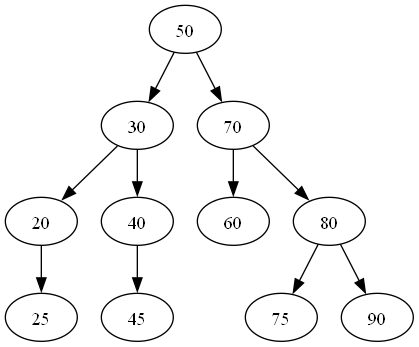

In [5]:
avl_tree = AVLTree()
data = [50, 30, 20, 40, 70, 60, 80, 25, 45, 90, 75]
for d in data:
  avl_tree.insert(d)

plot_tree(avl_tree.root)
Image(filename='./imgs/binary_search_tree.png')

# Step by Step Insert Node
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [6]:
def add_node(avl_tree,value):
    avl_tree.insert(value)
    plot_tree(avl_tree.root)
    Image(filename='./imgs/binary_search_tree.png')

### Add Node 50
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

Saved binary_search_tree.png


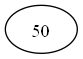

In [7]:
avl_tree = AVLTree()
add_node(avl_tree, 50)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 30
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

Saved binary_search_tree.png


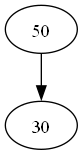

In [8]:
add_node(avl_tree, 30)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 20
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

Saved binary_search_tree.png


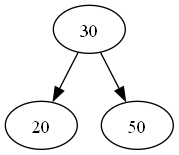

In [9]:
add_node(avl_tree, 20)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 40
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

Saved binary_search_tree.png


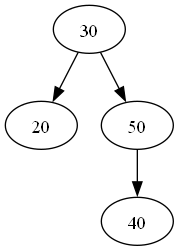

In [10]:
add_node(avl_tree, 40)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 70
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 70)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 80
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 80)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 25
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 25)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 45
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 45)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 90
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 90)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 75
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 75)
Image(filename='./imgs/binary_search_tree.png')

### Add Node 65
```
[50,30,20,40,70,60,80,25,45,90,75,65]
```

In [ ]:
add_node(avl_tree, 20)
Image(filename='./imgs/binary_search_tree.png')

In [2]:
import numpy as np
data = np.arange(9).reshape(3,3)
data[:,:] = data
print(data)

11
